In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:

configPath = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'#The path to the configuration file that defines the model's architecture and other parameters.
frozenpath = 'frozen_inference_graph.pb'#pre-trained weights and architecture of the object detection model.

In [4]:
model = cv2.dnn_DetectionModel(frozenpath,configPath)#(Deep Neural Network) module.

In [5]:
classNames= []
classFile = 'coco.names'
with open(classFile,'rt') as f:
    classNames = f.read().rstrip('\n').split('\n')

In [6]:
classNames

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'street sign',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'hat',
 'backpack',
 'umbrella',
 'shoe',
 'eye glasses',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'plate',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'mirror',
 'dining table',
 'window',
 'desk',
 'toilet',
 'door',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'blender',
 'book',
 'clock',
 'vase',
 'scis

In [7]:
len(classNames)

91

In [8]:
model.setInputSize(320,320)
model.setInputScale(1.0/ 127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0000029DD628B670>

In [14]:
import cv2
img = cv2.imread('girl.jpg')

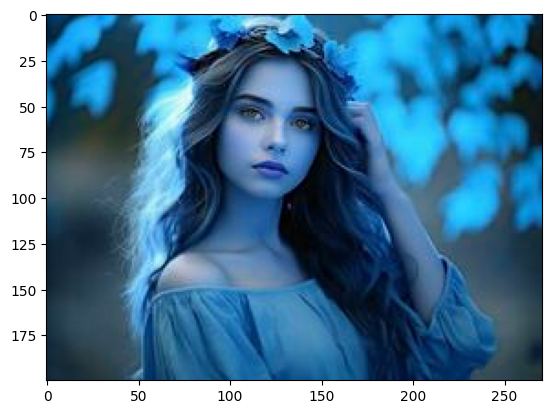

In [15]:
plt.imshow(img)

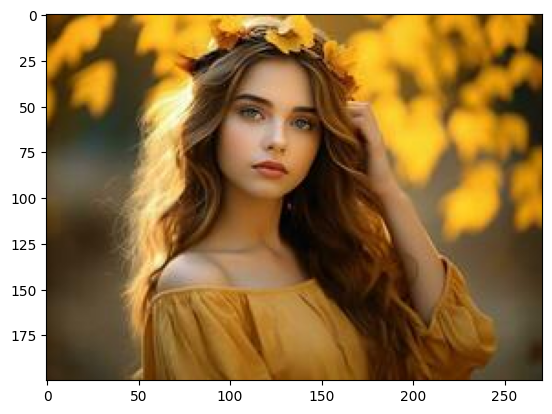

In [16]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [17]:
classIds, confs, bbox = model.detect(img,confThreshold=0.5)

In [18]:
classIds

array([1])

In [19]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for classId, confidence,box in zip(classIds.flatten(),confs.flatten(),bbox):
    cv2.rectangle(img,box,(255,0,0),2)
    cv2.putText(img,classNames[classId-1],(box[0]+10,box[1]+40),font,font_scale,color=(255,0,0),thickness=3)

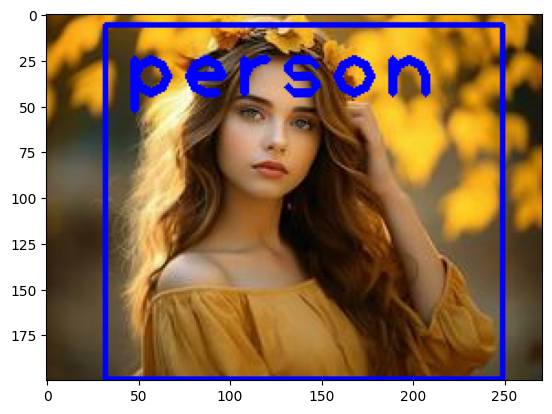

In [20]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [ ]:
cap = cv2.VideoCapture('pexels-omar-ramadan-5631418.mp4')
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Can Not Open Video')

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame= cap.read()
    classIds, confs, bbox = model.detect(frame,confThreshold=0.5)
    
    
    if (len(classIds)!= 0):
        for classId, confidence,box in zip(classIds.flatten(),confs.flatten(),bbox):
            if(classId<=90):
                cv2.rectangle(frame,box,(255,0,0),2)
                cv2.putText(frame,classNames[classId-1],(box[0]+10,box[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)
                
    cv2.imshow('Object Detection Tut By Ahmed',frame)
    
    if cv2.waitKey(1) & 0xFF== ord('q'):
        break
    
    
cap.release()
cv2.destroyAllWindows()
            


In [ ]:
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Can Not Open WebCam')

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame= cap.read()
    classIds, confs, bbox = model.detect(frame,confThreshold=0.5)
    
    
    if (len(classIds)!= 0):
        for classId, confidence,box in zip(classIds.flatten(),confs.flatten(),bbox):
            if(classId<=90):
                cv2.rectangle(frame,box,(255,0,0),2)
                cv2.putText(frame,classNames[classId-1],(box[0]+10,box[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)
                
    cv2.imshow('Object Detection Tut By Ahmed',frame)
    
    if cv2.waitKey(1) & 0xFF== ord('q'):
        break
    
    
cap.release()
cv2.destroyAllWindows()
            
